In [ ]:
!pip install control

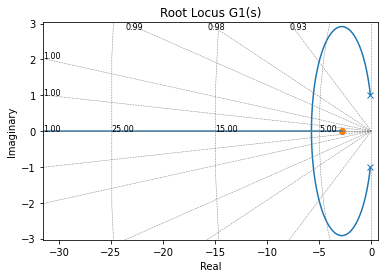

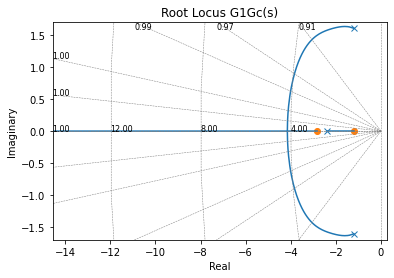

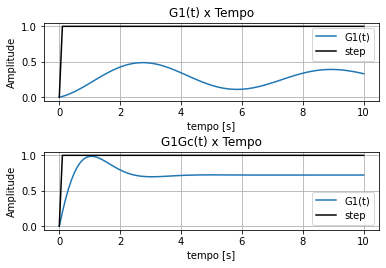

In [2]:
import control as co
import numpy as np
import matplotlib.pyplot as plt


# Definindo variável imaginária
s = co.TransferFunction.s


# condições de projeto
wn = 2
psi = 0.6

#função teste presente no slide está comentada e portanto desativada
#wn = 4.95
#psi = .404

# Definindo funcao G1(s)
G1 = (0.1*(s+2.83))/(s**2+0.19*s+1.04)
#G1 = 1/((s+1)*(s+4)*(s+6))

# Coletando polos e zeros
polos = co.pole(G1)
zeros = co.zero(G1)

#calculo do Pd desejado
pd = -wn*psi + wn*np.sqrt(1-psi**2)*1j

#calcular soma de angulos

#definir variavel de somatorio
sum_zero = np.pi/2

#percorre os zeros
for zero in zeros:

    #tg theta pela razao do imaginario pelo real -> do ponto zero atual até o pd desejado
    tg_theta = (pd.imag - zero.imag)/(pd.real - zero.real)

    #arco tangente
    theta = np.arctan(tg_theta)

    #se o pd estiver atras do zero, soma 180 graus
    if (pd.real - zero.real) < 0:
        theta += np.pi

    #somatorio
    sum_zero += theta


# definir variavel de somatorio
sum_polos = 0

# percorre os polos
for polo in polos:

    # tg theta pela razao do imaginario pelo real -> do ponto polo atual até o pd desejado
    tg_theta = (pd.imag - polo.imag) / (pd.real - polo.real)

    # arco tangente
    theta = np.arctan(tg_theta)

    # se o pd estiver atras do zero, soma 180 graus
    if (pd.real - polo.real) < 0:
        theta += np.pi

    # somatorio
    sum_polos += theta

ang_pc = np.pi + sum_zero - sum_polos

pc = pd.real - pd.imag/np.tan(ang_pc)


#Definindo Gc(s)
Gc = (s - pd.real)/(s - pc) #pd.real == zc

#Somando as Fts
G1Gc = G1*Gc

#Calculando o ganho K

#substituindo o valor do polo desejado em G1Gc
num_imaginario = co.evalfr(G1Gc,pd) #avalia o valor de G1Gc no ponto pd

#tirando o módulo do numero imaginário
modulo = np.sqrt(num_imaginario.real**2 + num_imaginario.imag**2)

#calculando K
K = 1/modulo

#Multiplicando o ganho na FT final
G1Gc = K*G1Gc

#com feedback unitário
G1Gc = co.feedback(G1Gc,1,sign=-1)

#Resposta degrau unitário
t = np.linspace(0,10,100)
t1,G1_step = co.step_response(G1,t)

t2,G1Gc_step = co.step_response((G1Gc),t)

'''Aqui pra baixo é tudo configuração de plotagem'''
# Plot do Root locus original
co.rlocus(G1 )
plt.title("Root Locus G1(s)")
plt.savefig("root_locus_G1.png")
plt.show()
plt.cla()
plt.clf()
plt.close()

#plot do Root locus novo
co.rlocus(G1Gc)
plt.title("Root Locus G1Gc(s)")
plt.savefig("root_locus_G1Gc.png")
plt.show()
plt.cla()
plt.clf()
plt.close()

#plot da resposta no tempo de G1 e G1Gc
fig,(axis1,axis2) = plt.subplots(2,1)
fig.tight_layout(pad=3.0)


axis1.plot(t,G1_step,label = "G1(t)")
axis1.plot(t,[0]+[1]*(len(t)-1),color="black",label="step")
axis1.set_title("G1(t) x Tempo")
axis1.set_xlabel("tempo [s]")
axis1.set_ylabel("Amplitude")
axis1.legend()
axis1.grid(True)

axis2.plot(t,G1Gc_step,label = "G1(t)")
axis2.plot(t,[0]+[1]*(len(t)-1),color="black",label="step")
axis2.set_title("G1Gc(t) x Tempo")
axis2.set_xlabel("tempo [s]")
axis2.set_ylabel("Amplitude")
axis2.legend()
axis2.grid(True)

fig.savefig("Resposta no Tempo.png")